<a href="https://colab.research.google.com/github/BartuPacall/4525-Bioinformatik-EGFR/blob/main/Ceng4525_Bioinformatik_EGFR5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Analysis of EGFR Mutations: Structure, Stability, and Drug Binding

**Project Overview:** This study investigates 17 clinically relevant EGFR (Epidermal Growth Factor Receptor) mutations using computational structural biology approaches to assess their impact on protein stability, binding pocket geometry, and drug interaction potential.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Environment Setup and Data Access

**Purpose:** Mount Google Drive to access computational tools (FoldX) and organize project files for downstream analysis.

In [2]:
# 1. Copy the files from your Drive to the local Colab disk
!cp /content/drive/MyDrive/FoldX/foldx_20261231 ./foldx
!cp /content/drive/MyDrive/FoldX/rotabase.txt ./rotabase.txt

# 2. Make the file executable
!chmod +x foldx

# 3. Verify the installation
!./foldx --help

   ********************************************
   ***                                      ***
   ***             FoldX 4 (c)              ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

FoldX program options:


Basic OPTIONS:
  -v [ --version ] arg (=Version beta 4)
                                        print version string
  -h [ --help ]                         produce help message
  -c [ --command ] arg                  Choose your FoldX Command:
         

### FoldX Installation

**Purpose:** Configure FoldX, a force field-based tool for quantitative prediction of protein stability changes upon mutation. The rotabase.txt file contains pre-calculated rotamer libraries essential for accurate side-chain modeling during energy calculations.

In [3]:
# v6 version download
!wget https://alphafold.ebi.ac.uk/files/AF-P00533-F1-model_v6.pdb -O EGFR_AlphaFold.pdb

--2026-01-08 00:57:43--  https://alphafold.ebi.ac.uk/files/AF-P00533-F1-model_v6.pdb
Resolving alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)... 34.149.152.8
Connecting to alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)|34.149.152.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘EGFR_AlphaFold.pdb’

EGFR_AlphaFold.pdb      [ <=>                ] 754.23K  --.-KB/s    in 0.005s  

2026-01-08 00:57:43 (138 MB/s) - ‘EGFR_AlphaFold.pdb’ saved [772334]



## 2. Protein Structure Acquisition

**Purpose:** Download the AlphaFold v6 predicted structure of human EGFR (UniProt: P00533). AlphaFold provides high-confidence structural predictions, serving as the wild-type reference for all subsequent mutation analyses.

In [4]:
# This process may take several minutes (because the protein is large).
!./foldx --command=RepairPDB --pdb=EGFR_AlphaFold.pdb

Görüntülenen çıkış son 5000 satıra kısaltıldı.
kn electrostatic=               0.00
partial covalent interactions = 0.00
Energy_Ionisation =             2.89
Entropy Complex =               0.00
-----------------------------------------------------------
Total          = 				  471.62

Residue PROA992 has high Energy, we mutate it to itself
Repair Residue ID= PROA992

BackHbond       =               -647.21
SideHbond       =               -338.28
Energy_VdW      =               -1123.80
Electro         =               -47.93
Energy_SolvP    =               1494.63
Energy_SolvH    =               -1468.73
Energy_vdwclash =               41.71
energy_torsion  =               60.96
backbone_vdwclash=              532.20
Entropy_sidec   =               652.08
Entropy_mainc   =               1920.70
water bonds     =               0.00
helix dipole    =               -11.47
loop_entropy    =               0.00
cis_bond        =               7.31
disulfide       =               -71.41
kn ele

### Structure Refinement

**Purpose:** Execute FoldX RepairPDB to optimize the wild-type structure by correcting minor steric clashes and refining side-chain conformations. This step is critical for obtaining reliable ΔΔG values, as energy calculations are highly sensitive to initial structure quality.

In [5]:
# List of point mutations to be analyzed
# Each mutation follows the format: OriginalAA + Position + MutatedAA
# A semicolon is included to match the input format required by the downstream tool

mutations = [
    "KA28T;", "NA234D;", "VA292L;", "VA292M;", "SA306L;", "CA311F;", "QA408R;",
    "GA598V;", "MA600V;", "EA758K;", "LA858R;", "AA864V;", "SA1025N;",
    "HA1124Q;", "DA1127N;", "SA1130G;", "QA1159H;"
]

# Write each mutation to a separate line in the output file
with open('individual_list_full.txt', 'w') as f:
    for m in mutations:
        f.write(m + '\n')

## 3. Mutation List Preparation

**Purpose:** Define 17 clinically documented EGFR mutations in FoldX format (e.g., "KA28T;" represents lysine to threonine at position 28). These mutations span various functional domains and are associated with cancer pathogenesis or drug resistance mechanisms.

In [6]:
!./foldx --command=BuildModel --pdb=EGFR_AlphaFold_Repair.pdb --mutant-file=individual_list_full.txt

   ********************************************
   ***                                      ***
   ***             FoldX 4 (c)              ***
   ***                                      ***
   ***     code by the FoldX Consortium     ***
   ***                                      ***
   ***     Jesper Borg, Frederic Rousseau   ***
   ***    Joost Schymkowitz, Luis Serrano   ***
   ***    Peter Vanhee, Erik Verschueren    ***
   ***     Lies Baeten, Javier Delgado      ***
   ***       and Francois Stricher          ***
   *** and any other of the 9! permutations ***
   ***   based on an original concept by    ***
   ***   Raphael Guerois and Luis Serrano   ***
   ********************************************

1 models read: EGFR_AlphaFold_Repair.pdb
Output: ./EGFR_AlphaFold_Repair.log

BackHbond       =               -669.24
SideHbond       =               -365.90
Energy_VdW      =               -1134.59
Electro         =               -47.46
Energy_SolvP    =               1498.79
E

### In Silico Mutagenesis

**Purpose:** Generate 17 mutant protein structures using FoldX BuildModel, which systematically introduces each point mutation and performs energy minimization. This produces both structural models and thermodynamic stability metrics (ΔΔG) for each variant.

In [7]:
import pandas as pd
import os

# 1. Doğru dosya ismini kontrol edelim
# FoldX BuildModel/PositionScan sonrası genelde 'Dif_' ile başlayan dosyalar üretir.
possible_files = [f for f in os.listdir('.') if f.endswith('.fxout') and 'Dif' in f]

if not possible_files:
    # Eğer Dif_ dosyası yoksa herhangi bir .fxout dosyasına bak
    possible_files = [f for f in os.listdir('.') if f.endswith('.fxout')]

if not possible_files:
    print("HATA: FoldX sonuç dosyası (.fxout) bulunamadı.")
else:
    # En güncel veya ilk dosyayı seç
    filename = possible_files[0]
    print(f"Okunan dosya: {filename}")

    try:
        # FoldX ham çıktıları genelde sekmeyle (tab) ayrılır ve ilk 8 satır meta veridir.
        # Header satırı genellikle 9. satırdır (index=8).
        df = pd.read_csv(filename, sep='\t', skiprows=8)

        # Sütun isimlerindeki boşlukları temizleyelim
        df.columns = [c.strip() for c in df.columns]

        # FoldX çıktı formatına göre dinamik sütun seçimi
        # İlk sütun mutant ismidir, 'total energy' sütunu ise ddG değerini verir.
        mutant_col = df.columns[0]
        energy_col = 'total energy'

        if energy_col not in df.columns:
            # Eğer 'total energy' bulunamazsa, sayısal değer içeren ikinci sütunu dene
            energy_col = df.select_dtypes(include=['number']).columns[0]

        summary = df[[mutant_col, energy_col]].copy()
        summary.columns = ['Mutation', 'ddG (kcal/mol)']

        # Enerji farkı (ddG) yorumlama fonksiyonu
        def interpret_ddg(val):
            try:
                val = float(val)
                # FoldX'te pozitif değerler kararsızlığı (unstable), negatifler stabiliteyi artışı ifade eder.
                if val > 1.5: return "Çok Kararsızlaştırıcı (Highly Destabilizing)"
                if val > 0.5: return "Kararsızlaştırıcı (Destabilizing)"
                if val < -0.5: return "Stabilize Edici (Stabilizing)"
                return "Nötr (Neutral)"
            except:
                return "Veri Hatası"

        summary['Interpretation'] = summary['ddG (kcal/mol)'].apply(interpret_ddg)

        print("\n--- EGFR MUTASYON ANALİZ SONUÇLARI ---")
        print(summary.to_string(index=False))

        # CSV olarak dışa aktar
        output_name = 'egfr_mutasyon_ozet.csv'
        summary.to_csv(output_name, index=False)
        print(f"\nSonuçlar '{output_name}' olarak kaydedildi.")

    except Exception as e:
        print(f"İşlem sırasında bir hata oluştu: {e}")


Okunan dosya: Dif_EGFR_AlphaFold_Repair.fxout

--- EGFR MUTASYON ANALİZ SONUÇLARI ---
                    Mutation  ddG (kcal/mol)                               Interpretation
 EGFR_AlphaFold_Repair_1.pdb        1.560380 Çok Kararsızlaştırıcı (Highly Destabilizing)
 EGFR_AlphaFold_Repair_2.pdb        0.020031                               Nötr (Neutral)
 EGFR_AlphaFold_Repair_3.pdb        0.257134                               Nötr (Neutral)
 EGFR_AlphaFold_Repair_4.pdb        0.474284                               Nötr (Neutral)
 EGFR_AlphaFold_Repair_5.pdb       -1.719400                Stabilize Edici (Stabilizing)
 EGFR_AlphaFold_Repair_6.pdb        4.702310 Çok Kararsızlaştırıcı (Highly Destabilizing)
 EGFR_AlphaFold_Repair_7.pdb       -0.477644                               Nötr (Neutral)
 EGFR_AlphaFold_Repair_8.pdb        6.096410 Çok Kararsızlaştırıcı (Highly Destabilizing)
 EGFR_AlphaFold_Repair_9.pdb        0.578128            Kararsızlaştırıcı (Destabilizing)
EGFR_AlphaFold

## 4. Stability Analysis and Interpretation

**Purpose:** Parse FoldX output to extract ΔΔG values (change in folding free energy relative to wild-type) and classify mutations. Positive ΔΔG indicates destabilization (potential loss of function), while negative values suggest stabilization. This thermodynamic profiling identifies mutations that may compromise protein structural integrity.

In [8]:
!apt-get update
!apt-get install -y build-essential cmake git libnetcdf-dev


import os
if not os.path.exists('fpocket'):
    !git clone https://github.com/Discngine/fpocket.git

%cd fpocket

!make
!sudo make install

!fpocket -h

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,863 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,580 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,599 kB]
Get:14 http

## 5. Binding Site Analysis Setup

**Purpose:** Install fpocket, a geometry-based tool for automated detection and characterization of protein cavities and pockets. This enables quantitative assessment of how mutations alter the shape, volume, and druggability of potential ligand-binding sites.

In [9]:
# Vahşi Tip (WT)
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair.pdb

# 17 Mutasyonun her biri için tek tek fpocket çalıştırılması
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_1.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_2.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_3.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_4.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_5.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_6.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_7.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_8.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_9.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_10.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_11.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_12.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_13.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_14.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_15.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_16.pdb
!/content/fpocket/bin/fpocket -f /content/EGFR_AlphaFold_Repair_17.pdb

***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET HUNTING ENDS ***** 
***** POCKET HUNTING BEGINS ***** 
***** POCKET 

### Pocket Detection Across All Structures

**Purpose:** Run fpocket on wild-type and all 17 mutant structures to identify and characterize binding pockets. This systematic analysis generates comprehensive geometric and physicochemical descriptors (volume, surface area, hydrophobicity, druggability score) for each structure's binding landscape.

In [10]:
import os
import re
import pandas as pd
import numpy as np
from IPython.display import display

# ======================================================
# 1. fpocket INFO DOSYASI OKUMA
# ======================================================

def parse_pocket_info(info_path):
    """
    fpocket *_info.txt dosyasından metrikleri güvenli şekilde çeker
    (tek cep / global pocket formatı)
    """
    metrics = {
        "score": np.nan,
        "druggability": np.nan,
        "volume": np.nan,
        "sasa": np.nan,
        "hydrophobicity": np.nan
    }

    try:
        with open(info_path, "r", encoding="utf-8", errors="ignore") as f:
            content = f.read()

            def extract(pattern):
                m = re.search(pattern, content, re.IGNORECASE)
                return float(m.group(1)) if m else np.nan

            metrics["score"] = extract(r"Score\s*:\s*([-+]?\d*\.?\d+)")
            metrics["druggability"] = extract(r"Druggability Score\s*:\s*([-+]?\d*\.?\d+)")
            metrics["volume"] = extract(r"Volume\s*:\s*([-+]?\d*\.?\d+)")
            metrics["sasa"] = extract(r"SASA\s*:\s*([-+]?\d*\.?\d+)")
            metrics["hydrophobicity"] = extract(r"Hydrophobicity score\s*:\s*([-+]?\d*\.?\d+)")

    except Exception as e:
        print(f"HATA: {info_path} okunamadı -> {e}")

    return metrics


# ======================================================
# 2. TEK BİR _out KLASÖRÜNDEN INFO OKUMA
# ======================================================

def collect_fpocket_metrics(out_dir):
    """
    Verilen *_out klasörü altındaki TÜM *_info.txt dosyalarını okur.
    Dosya isimlerine dokunmaz.
    """
    rows = []

    for root, _, files in os.walk(out_dir):
        for file in files:
            if file.endswith("_info.txt"):
                full_path = os.path.join(root, file)

                data = parse_pocket_info(full_path)
                data["source_file"] = file
                data["source_path"] = root
                rows.append(data)

    if not rows:
        return pd.DataFrame()

    return pd.DataFrame(rows)


# ======================================================
# 3. ANA KLASÖRDEKİ TÜM _out KLASÖRLERİNİ TOPLA
# ======================================================

def collect_all_structures(parent_dir):
    """
    parent_dir içindeki tüm *_out klasörlerini otomatik bulur
    ve içlerindeki *_info.txt dosyalarını okur.
    """
    results = {}

    for item in sorted(os.listdir(parent_dir)):
        out_path = os.path.join(parent_dir, item)

        if os.path.isdir(out_path) and item.endswith("_out"):
            structure_name = item.replace("_out", "")
            df = collect_fpocket_metrics(out_path)

            if not df.empty:
                results[structure_name] = df
                print(f"✅ {structure_name}: info dosyası okundu")
            else:
                print(f"⚠️ {structure_name}: info dosyası bulunamadı")

    return results


# ======================================================
# 4. ANA KLASÖR YOLU (BURAYI SEN DOLDUR)
# ======================================================

parent_folder = "/content/EGFR_AlphaFold_Mutation"   # <-- TÜM *_out klasörlerinin olduğu yer

results = collect_all_structures(parent_folder)


# ======================================================
# 5. WT REFERANSLI TOPLU PDS HESABI (Tam Sıralı)
# ======================================================

wt_key = "EGFR_AlphaFold_Repair"

if wt_key not in results:
    print(f"❌ HATA: '{wt_key}' bulunamadı.")
else:
    # WT referans cebini al
    wt_df = results[wt_key].sort_values("druggability", ascending=False)
    wt_best = wt_df.iloc[0]

    final_rows = []

    for name, df in results.items():
        curr_df = df.sort_values("druggability", ascending=False)
        curr_best = curr_df.iloc[0]

        dvol = curr_best["volume"] - wt_best["volume"]
        dsasa = curr_best["sasa"] - wt_best["sasa"]
        dhyd = curr_best["hydrophobicity"] - wt_best["hydrophobicity"]
        pds = abs(dvol) + abs(dsasa) + abs(dhyd)

        final_rows.append({
            "Structure": name,
            "Pocket_File": curr_best["source_file"],
            "Druggability": round(curr_best["druggability"], 3),
            "Volume": round(curr_best["volume"], 2),
            "SASA": round(curr_best["sasa"], 2),
            "dVolume": round(dvol, 2),
            "dSASA": round(dsasa, 2),
            "PDS": round(pds, 2)
        })

    pds_df = pd.DataFrame(final_rows)

    # --- DOĞAL SIRALAMA FONKSİYONU ---
    # Metin içindeki sayıları bulur ve sayısal olarak döndürür
    def natural_sort_key(text):
        return [int(c) if c.isdigit() else c.lower() for c in re.split(r'(\d+)', text)]

    # Önce WT yapısını ayırıp en başa koyalım, sonra kalanları sayısal sıralayalım
    wt_row = pds_df[pds_df['Structure'] == wt_key]
    mutant_rows = pds_df[pds_df['Structure'] != wt_key].copy()

    # Mutantları "Structure" ismindeki sayıya göre sırala (Mutant_1, Mutant_2... Mutant_10)
    mutant_rows['temp_sort'] = mutant_rows['Structure'].apply(natural_sort_key)
    mutant_rows = mutant_rows.sort_values('temp_sort').drop('temp_sort', axis=1)

    # WT'yi en başa ekleyip birleştir
    pds_df = pd.concat([wt_row, mutant_rows], ignore_index=True)

    print("\n--- PDS ANALİZİ: WT BAŞTA VE MUTANTLAR SIRALI ---")
    display(pds_df)

    pds_df.to_csv("fpocket_PDS_final_sorted.csv", index=False)

✅ EGFR_AlphaFold_Repair_10: info dosyası okundu
✅ EGFR_AlphaFold_Repair_11: info dosyası okundu
✅ EGFR_AlphaFold_Repair_12: info dosyası okundu
✅ EGFR_AlphaFold_Repair_13: info dosyası okundu
✅ EGFR_AlphaFold_Repair_14: info dosyası okundu
✅ EGFR_AlphaFold_Repair_15: info dosyası okundu
✅ EGFR_AlphaFold_Repair_16: info dosyası okundu
✅ EGFR_AlphaFold_Repair_17: info dosyası okundu
✅ EGFR_AlphaFold_Repair_1: info dosyası okundu
✅ EGFR_AlphaFold_Repair_2: info dosyası okundu
✅ EGFR_AlphaFold_Repair_3: info dosyası okundu
✅ EGFR_AlphaFold_Repair_4: info dosyası okundu
✅ EGFR_AlphaFold_Repair_5: info dosyası okundu
✅ EGFR_AlphaFold_Repair_6: info dosyası okundu
✅ EGFR_AlphaFold_Repair_7: info dosyası okundu
✅ EGFR_AlphaFold_Repair_8: info dosyası okundu
✅ EGFR_AlphaFold_Repair_9: info dosyası okundu
✅ EGFR_AlphaFold_Repair: info dosyası okundu

--- PDS ANALİZİ: WT BAŞTA VE MUTANTLAR SIRALI ---


,Structure,Pocket_File,Druggability,Volume,SASA,dVolume,dSASA,PDS
0,EGFR_AlphaFold_Repair,EGFR_AlphaFold_Repair_info.txt,0.016,253.86,79.64,0.00,0.00,0.00
1,EGFR_AlphaFold_Repair_1,EGFR_AlphaFold_Repair_1_info.txt,0.016,256.60,74.81,2.74,-4.83,7.57
2,EGFR_AlphaFold_Repair_2,EGFR_AlphaFold_Repair_2_info.txt,0.016,257.29,79.64,3.44,0.00,3.44
3,EGFR_AlphaFold_Repair_3,EGFR_AlphaFold_Repair_3_info.txt,0.016,250.12,79.64,-3.74,0.00,3.74
4,EGFR_AlphaFold_Repair_4,EGFR_AlphaFold_Repair_4_info.txt,0.016,252.87,79.64,-0.99,0.00,0.99
5,EGFR_AlphaFold_Repair_5,EGFR_AlphaFold_Repair_5_info.txt,0.013,255.70,78.37,1.85,-1.27,3.12
6,EGFR_AlphaFold_Repair_6,EGFR_AlphaFold_Repair_6_info.txt,0.016,256.53,79.64,2.67,0.00,2.67
7,EGFR_AlphaFold_Repair_7,EGFR_AlphaFold_Repair_7_info.txt,0.016,261.72,79.64,7.86,0.00,7.86
8,EGFR_AlphaFold_Repair_8,EGFR_AlphaFold_Repair_8_info.txt,0.016,256.45,79.64,2.60,0.00,2.60
9,EGFR_AlphaFold_Repair_9,EGFR_AlphaFold_Repair_9_info.txt,0.016,246.76,79.64,-7.10,0.00,7.10


## 6. Pocket Deviation Score (PDS) Calculation

**Purpose:** Compute PDS, a composite metric quantifying mutation-induced changes in binding pocket geometry relative to wild-type. PDS integrates volume deviation, surface accessibility changes, and hydrophobicity shifts to assess how mutations reshape the drug-binding environment, potentially affecting therapeutic efficacy.

### Data Organization

**Purpose:** Consolidate fpocket output directories into a centralized location for efficient batch processing and downstream analysis. Proper file organization is essential for reproducibility and systematic data extraction across multiple structures.

In [11]:
!pip install py3Dmol

## 7. Visualization Setup

**Purpose:** Install py3Dmol for interactive 3D molecular visualization within the notebook environment, enabling structural inspection of mutation sites and binding pockets.

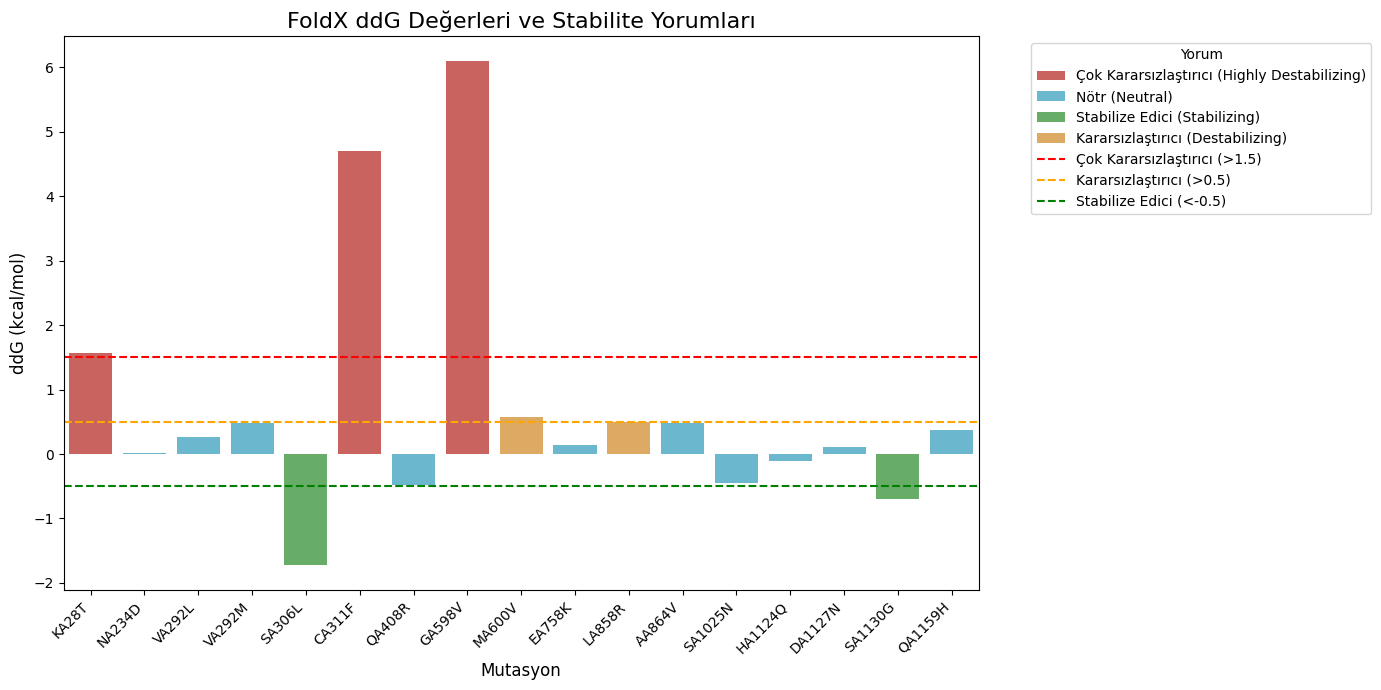

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the mutations_list as provided in the problem description.
mutations_list = [
    "KA28T", "NA234D", "VA292L", "VA292M", "SA306L", "CA311F", "QA408R",
    "GA598V", "MA600V", "EA758K", "LA858R", "AA864V", "SA1025N",
    "HA1124Q", "DA1127N", "SA1130G", "QA1159H"
]

# 2. Create a mutation_mapping dictionary to map PDB file names to mutation names.
mutation_mapping = {
    f"EGFR_AlphaFold_Repair_{i+1}.pdb": mutations_list[i]
    for i in range(len(mutations_list))
}

# 3. Add a new column named Mutation_Name to the summary DataFrame
#    by mapping the Mutation column using mutation_mapping.
#    Handle cases where the mutation name might not be found (e.g., WT or other files).
summary['Mutation_Name'] = summary['Mutation'].apply(lambda x: mutation_mapping.get(x, x.replace('.pdb', '')))


# 4. Define a dictionary colors for the Interpretation categories as provided.
colors = {
    "Çok Kararsızlaştırıcı (Highly Destabilizing)": "#D9534F",  # Kırmızı
    "Kararsızlaştırıcı (Destabilizing)": "#F0AD4E",     # Turuncu
    "Nötr (Neutral)": "#5BC0DE",                  # Mavi
    "Stabilize Edici (Stabilizing)": "#5CB85C"      # Yeşil
}

# 5. Create a new figure with a specified size (e.g., 14x7 inches).
plt.figure(figsize=(14, 7))

# 6. Generate a bar plot using seaborn.barplot() with Mutation_Name on the x-axis, ddG (kcal/mol) on the y-axis, and Interpretation for coloring, ensuring dodge=False.
sns.barplot(
    data=summary,
    x='Mutation_Name',
    y='ddG (kcal/mol)',
    hue='Interpretation',
    palette=colors,
    dodge=False
)

# 7. Set the title of the plot to 'FoldX ddG Değerleri ve Stabilite Yorumları' and label the x and y axes as 'Mutasyon' and 'ddG (kcal/mol)' respectively.
plt.title('FoldX ddG Değerleri ve Stabilite Yorumları', fontsize=16)
plt.xlabel('Mutasyon', fontsize=12)
plt.ylabel('ddG (kcal/mol)', fontsize=12)

# 8. Rotate the x-axis labels by 45 degrees for better readability.
plt.xticks(rotation=45, ha='right')

# 9. Add horizontal lines at y-values 0.5, -0.5, and 1.5 with specified colors, line styles, and labels to indicate interpretation thresholds.
plt.axhline(y=1.5, color='red', linestyle='--', label='Çok Kararsızlaştırıcı (>1.5)')
plt.axhline(y=0.5, color='orange', linestyle='--', label='Kararsızlaştırıcı (>0.5)')
plt.axhline(y=-0.5, color='green', linestyle='--', label='Stabilize Edici (<-0.5)')

# 10. Add a legend with a title and adjusted position (e.g., bbox_to_anchor=(1.05, 1) and loc='upper left').
plt.legend(title='Yorum', bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Adjust the plot layout to prevent labels from overlapping (plt.tight_layout()).
plt.tight_layout()

# 12. Display the plot (plt.show()).
plt.show()

### Stability Profile Visualization

**Purpose:** Generate a comprehensive bar plot displaying ΔΔG values for all mutations with color-coded stability classifications. Visual representation facilitates rapid identification of highly destabilizing mutations that may impair protein function or alter disease phenotype.

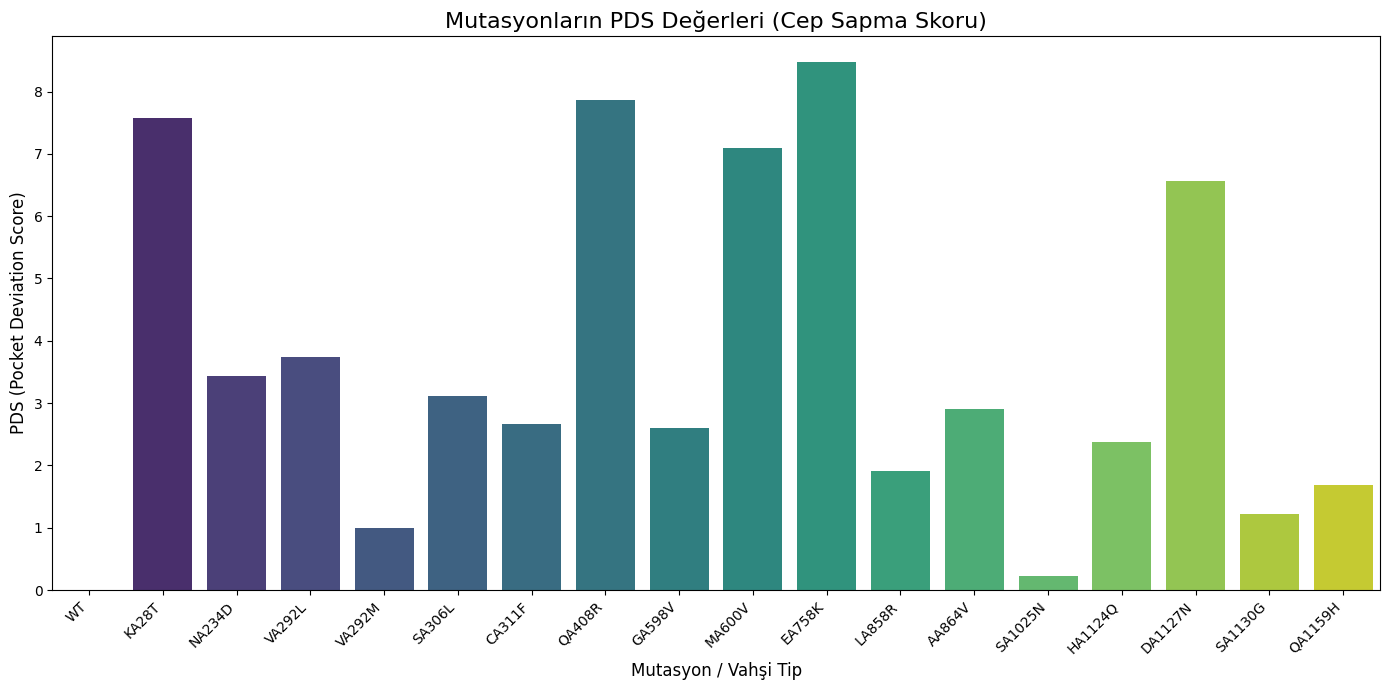

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for plotting and add a 'Mutation_Name' column
pds_df_plot = pds_df.copy()

# Original mutation list (without semicolons) to map back to PDB file names
mutations_list = [
    "KA28T", "NA234D", "VA292L", "VA292M", "SA306L", "CA311F", "QA408R",
    "GA598V", "MA600V", "EA758K", "LA858R", "AA864V", "SA1025N",
    "HA1124Q", "DA1127N", "SA1130G", "QA1159H"
]

# Map structure names to actual mutation names or 'WT'
def get_mutation_or_wt_name(structure_name):
    if structure_name == 'EGFR_AlphaFold_Repair':
        return 'WT'
    else:
        # Extract the number from 'EGFR_AlphaFold_Repair_X'
        index_str = structure_name.replace('EGFR_AlphaFold_Repair_', '')
        try:
            index = int(index_str)
            # -1 because mutations_list is 0-indexed and PDB file names are 1-indexed
            return mutations_list[index - 1]
        except (ValueError, IndexError):
            return structure_name # Fallback if parsing fails

pds_df_plot['Mutation_Name'] = pds_df_plot['Structure'].apply(get_mutation_or_wt_name)

plt.figure(figsize=(14, 7))
sns.barplot(x='Mutation_Name', y='PDS', data=pds_df_plot, palette='viridis', hue='Mutation_Name', legend=False)
plt.title('Mutasyonların PDS Değerleri (Cep Sapma Skoru)', fontsize=16)
plt.xlabel('Mutasyon / Vahşi Tip', fontsize=12)
plt.ylabel('PDS (Pocket Deviation Score)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### Pocket Deviation Visualization

**Purpose:** Visualize PDS values across all mutations to identify variants causing significant geometric perturbations in the binding site. High PDS scores indicate substantial pocket remodeling, which may alter ligand recognition or drug binding affinity.

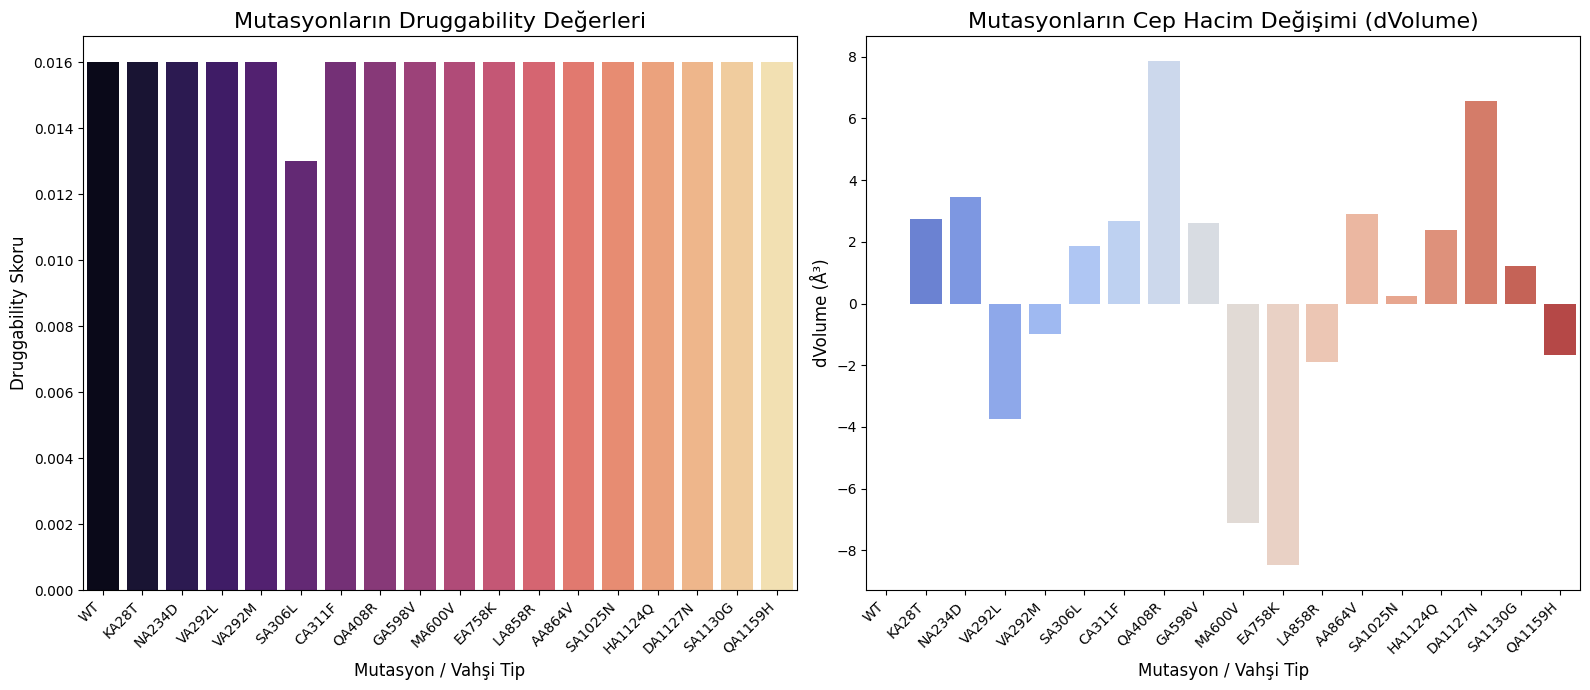

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a copy for plotting and add a 'Mutation_Name' column if not already present
pds_df_plot = pds_df_plot if 'pds_df_plot' in locals() else pds_df.copy()

# Map structure names to actual mutation names or 'WT'
def get_mutation_or_wt_name(structure_name):
    if structure_name == 'EGFR_AlphaFold_Repair':
        return 'WT'
    else:
        # Original mutation list (without semicolons) to map back to PDB file names
        mutations_list = [
            "KA28T", "NA234D", "VA292L", "VA292M", "SA306L", "CA311F", "QA408R",
            "GA598V", "MA600V", "EA758K", "LA858R", "AA864V", "SA1025N",
            "HA1124Q", "DA1127N", "SA1130G", "QA1159H"
        ]
        # Extract the number from 'EGFR_AlphaFold_Repair_X'
        index_str = structure_name.replace('EGFR_AlphaFold_Repair_', '')
        try:
            index = int(index_str)
            # -1 because mutations_list is 0-indexed and PDB file names are 1-indexed
            return mutations_list[index - 1]
        except (ValueError, IndexError):
            return structure_name # Fallback if parsing fails

pds_df_plot['Mutation_Name'] = pds_df_plot['Structure'].apply(get_mutation_or_wt_name)

# -----------------------------------------------------
# 3. Ceplerin Druggability ve Hacim Değişimlerini Görselleştir
# -----------------------------------------------------

plt.figure(figsize=(16, 7))

# Subplot 1: Druggability
plt.subplot(1, 2, 1)
sns.barplot(x='Mutation_Name', y='Druggability', data=pds_df_plot, palette='magma', hue='Mutation_Name', legend=False)
plt.title('Mutasyonların Druggability Değerleri', fontsize=16)
plt.xlabel('Mutasyon / Vahşi Tip', fontsize=12)
plt.ylabel('Druggability Skoru', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Subplot 2: dVolume
plt.subplot(1, 2, 2)
sns.barplot(x='Mutation_Name', y='dVolume', data=pds_df_plot, palette='coolwarm', hue='Mutation_Name', legend=False)
plt.title('Mutasyonların Cep Hacim Değişimi (dVolume)', fontsize=16)
plt.xlabel('Mutasyon / Vahşi Tip', fontsize=12)
plt.ylabel('dVolume (Å³)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


### Druggability and Volume Analysis

**Purpose:** Compare druggability scores and pocket volume changes across mutations. Druggability quantifies the likelihood of successful small-molecule targeting, while volume changes indicate cavity expansion or contraction that may affect drug accommodation.

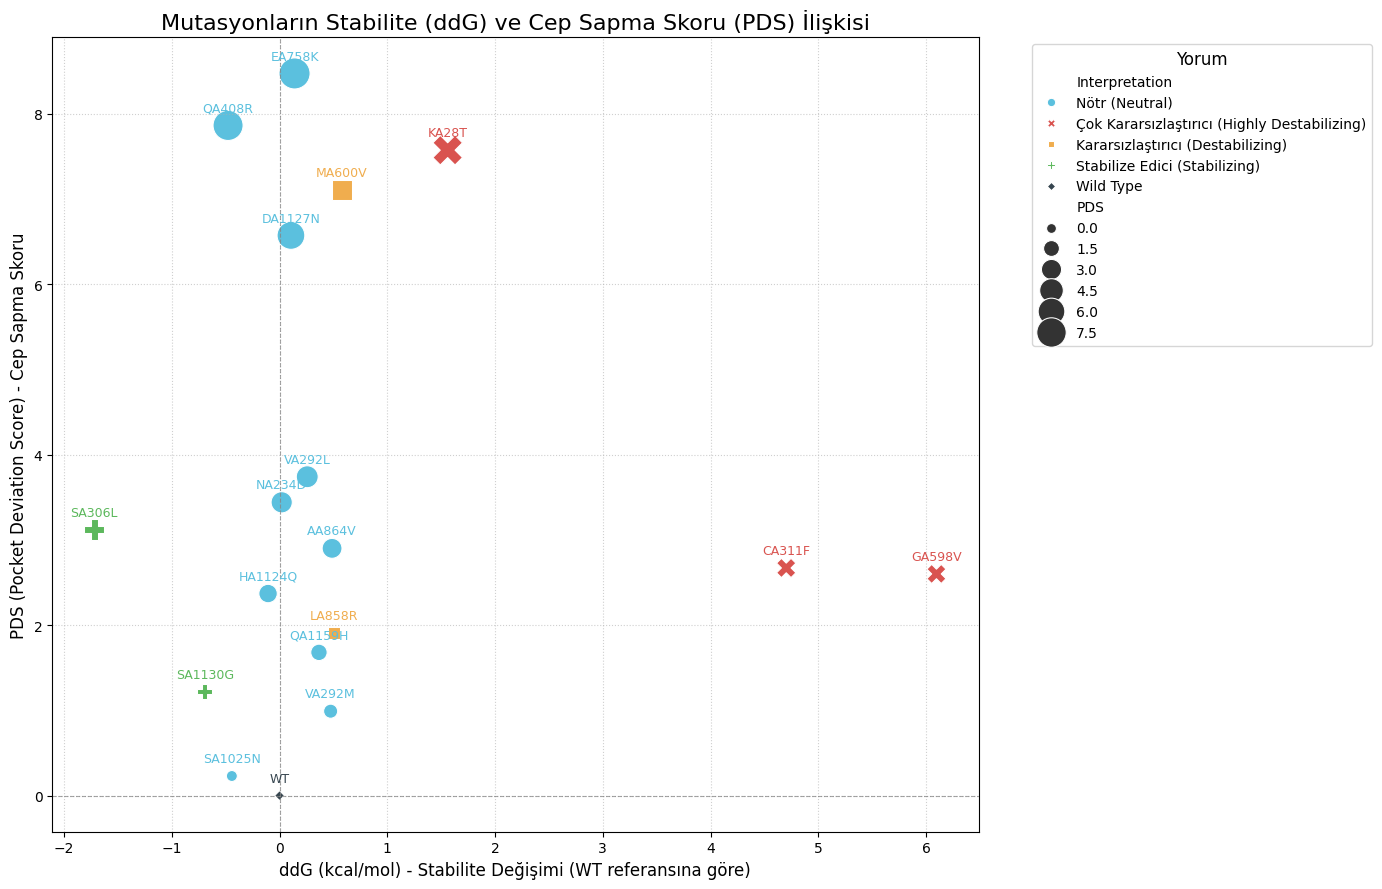

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure pds_df_plot is available and has 'Mutation_Name' populated.
# If this cell is run independently, re-run the necessary preceding cells.
# Assuming summary and pds_df_plot are available from previous steps.

# Select relevant columns from summary
summary_for_merge = summary[['Mutation_Name', 'ddG (kcal/mol)', 'Interpretation']]

# Select relevant columns from pds_df_plot
pds_for_merge = pds_df_plot[['Mutation_Name', 'PDS']]

# Merge them. Use 'outer' to keep 'WT' from pds_for_merge and fill ddG with 0.
# This ensures both mutants and WT are included.
combined_df = pd.merge(summary_for_merge, pds_for_merge, on='Mutation_Name', how='outer')

# For 'WT', ddG should be 0, and interpretation is 'Wild Type'.
combined_df.loc[combined_df['Mutation_Name'] == 'WT', 'ddG (kcal/mol)'] = 0
combined_df.loc[combined_df['Mutation_Name'] == 'WT', 'Interpretation'] = 'Wild Type'
# Ensure PDS for WT is 0 (it should already be, but explicitly setting it makes it robust).
combined_df.loc[combined_df['Mutation_Name'] == 'WT', 'PDS'] = 0

# Drop any rows that might still have NaN for ddG or PDS (should be minimal with 'outer' merge and fill).
combined_df = combined_df.dropna(subset=['ddG (kcal/mol)', 'PDS'])

# Define custom colors for interpretation categories, including Wild Type
comparison_colors = {
    "Çok Kararsızlaştırıcı (Highly Destabilizing)": "#D9534F",  # Red
    "Kararsızlaştırıcı (Destabilizing)": "#F0AD4E",     # Orange
    "Nötr (Neutral)": "#5BC0DE",                  # Blue
    "Stabilize Edici (Stabilizing)": "#5CB85C",      # Green
    "Wild Type": "#36454F"             # Charcoal for WT
}

plt.figure(figsize=(14, 9)) # Adjust figure size for better readability of annotations
sns.scatterplot(
    data=combined_df,
    x='ddG (kcal/mol)',
    y='PDS',
    hue='Interpretation',
    style='Interpretation', # Use style to differentiate for colorblindness
    size='PDS', # Make size proportional to PDS for emphasis
    sizes=(50, 500), # Range of sizes for the points
    palette=comparison_colors
)

# Add annotations for each point
for i, row in combined_df.iterrows():
    plt.annotate(
        row['Mutation_Name'],
        (row['ddG (kcal/mol)'], row['PDS']),
        textcoords="offset points",
        xytext=(0,10), # Offset text slightly above the point
        ha='center', # Center horizontally
        fontsize=9, # Smaller font for annotations
        color=comparison_colors.get(row['Interpretation'], 'black') # Use interpretation color for text
    )

plt.title('Mutasyonların Stabilite (ddG) ve Cep Sapma Skoru (PDS) İlişkisi', fontsize=16)
plt.xlabel('ddG (kcal/mol) - Stabilite Değişimi (WT referansına göre)', fontsize=12)
plt.ylabel('PDS (Pocket Deviation Score) - Cep Sapma Skoru', fontsize=12)

# Add lines for no change in ddG and PDS (WT reference)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, alpha=0.7)

plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(title='Yorum', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='12')
plt.tight_layout()
plt.show()

### Integrated Stability-Pocket Analysis

**Purpose:** Create a scatter plot correlating ΔΔG with PDS to reveal relationships between protein stability and binding pocket geometry. This integrated analysis identifies mutations that simultaneously destabilize the protein and distort the binding site, potentially leading to drug resistance.

In [18]:
import os

# === DOSYA LİSTESİ ===
input_pdbs = ["/content/EGFR_AlphaFold_Repair.pdb"] + [
    f"/content/EGFR_AlphaFold_Repair_{i}.pdb" for i in range(1, 18)
]

output_dir = "/content/clean"
os.makedirs(output_dir, exist_ok=True)

# === ELEMENT TAHMİNİ (AYNI KALDI) ===
def infer_element(atom_name):
    atom_name = atom_name.strip()

    if atom_name.startswith("C"):
        return "C"
    if atom_name.startswith("N"):
        return "N"
    if atom_name.startswith("O"):
        return "O"
    if atom_name.startswith("S"):
        return "S"
    if atom_name.startswith("H"):
        return "H"

    return atom_name[0].upper()

# === CLEAN FONKSİYONU ===
def clean_pdb(input_pdb, output_pdb):
    atom_serial = 1

    with open(input_pdb) as f, open(output_pdb, "w") as out:
        for line in f:
            if line.startswith(("ATOM", "HETATM")):
                atom_name = line[12:16]
                element = infer_element(atom_name)

                # PDB Formatına uygun kolon bazlı yazım
                out.write(
                    f"{line[:6]}"
                    f"{atom_serial:5d} "
                    f"{line[12:16]}"
                    f"{line[16:17]}"
                    f"{line[17:20]} "
                    f"{line[21:22]}"
                    f"{line[22:26]}"
                    f"{line[26:30]}"
                    f"{float(line[30:38]):8.3f}"
                    f"{float(line[38:46]):8.3f}"
                    f"{float(line[46:54]):8.3f}"
                    f"{float(line[54:60]):6.2f}"
                    f"{float(line[60:66]):6.2f}"
                    f"{'':10}"
                    f"{element:>2}\n"
                )
                atom_serial += 1

        out.write("TER\nEND\n")

# === TOPLU ÇALIŞTIR ===
for pdb in input_pdbs:
    if os.path.exists(pdb):
        out_name = os.path.basename(pdb).replace(".pdb", "_clean.pdb")
        out_path = os.path.join(output_dir, out_name)
        clean_pdb(pdb, out_path)
        print(f"✅ Cleaned: {out_name}")
    else:
        print(f"⚠️ Dosya bulunamadı: {pdb}")

print("\n🎯 Tüm WT + 17 mutasyon PDB clean edildi.")

✅ Cleaned: EGFR_AlphaFold_Repair_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_1_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_2_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_3_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_4_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_5_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_6_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_7_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_8_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_9_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_10_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_11_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_12_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_13_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_14_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_15_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_16_clean.pdb
✅ Cleaned: EGFR_AlphaFold_Repair_17_clean.pdb

🎯 Tüm WT + 17 mutasyon PDB clean edildi.


## 8. Molecular Docking Preparation

**Purpose:** Clean and standardize PDB files by correcting atom numbering, adding proper element identifiers, and ensuring format compliance. Proper structure preparation is prerequisite for accurate molecular docking simulations with AutoDock Vina.

In [19]:
!apt-get install -y autodocktools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package autodocktools is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'autodocktools' has no installation candidate


### Docking Tools Installation

**Purpose:** Install AutoDockTools and dependencies required for receptor preparation and PDBQT format conversion, enabling molecular docking simulations with AutoDock Vina.

In [20]:
!apt-get install -y python2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2-minimal
  python2.7 python2.7-minimal
Suggested packages:
  python2-doc python-tk python2.7-doc binfmt-support
The following NEW packages will be installed:
  libpython2-stdlib libpython2.7-minimal libpython2.7-stdlib python2
  python2-minimal python2.7 python2.7-minimal
0 upgraded, 7 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,012 kB of archives.
After this operation, 16.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libpython2.7-minimal amd64 2.7.18-13ubuntu1.5 [347 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python2.7-minimal amd64 2.7.18-13ubuntu1.5 [1,400 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python2-minimal amd64 2.7.18-3 [20.8 

In [21]:
import os
import subprocess

# MGLTools içindeki hazırlık betiğinin yolu
PREPARE_RECEPTOR = "/usr/share/mgltools/MGLToolsPckgs/AutoDockTools/Utilities24/prepare_receptor4.py"

clean_dir = "/content/clean"
pdbqt_dir = "/content/pdbqt"
os.makedirs(pdbqt_dir, exist_ok=True)

# Temizlenmiş PDB dosyalarını listele
clean_pdbs = [f for f in os.listdir(clean_dir) if f.endswith("_clean.pdb")]

for pdb in clean_pdbs:
    input_pdb = os.path.join(clean_dir, pdb)
    output_pdbqt = os.path.join(
        pdbqt_dir, pdb.replace("_clean.pdb", ".pdbqt")
    )

    # AutoDockTools komutunu yapılandır
    # -A hydrogens: Sadece polar hidrojenlerin eklenmesini sağlar
    cmd = [
        "python2", PREPARE_RECEPTOR,
        "-r", input_pdb,
        "-o", output_pdbqt,
        "-A", "hydrogens"
    ]

    # Komutu çalıştır
    subprocess.run(cmd)
    print(f"✅ Receptor PDBQT üretildi: {output_pdbqt}")

print("\n🎯 TÜM WT + 17 MUTANT receptor pdbqt HAZIR")

✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_5.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_13.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_3.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_2.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_16.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_1.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_8.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_4.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_9.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_10.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_12.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repair_17.pdbqt
✅ Receptor PDBQT üretildi: /content/pdbqt/EGFR_AlphaFold_Repa

In [24]:
!apt-get update -qq
!apt-get install -y openbabel


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libboost-iostreams1.74.0 libinchi1 libmaeparser1 libopenbabel7
The following NEW packages will be installed:
  libboost-iostreams1.74.0 libinchi1 libmaeparser1 libopenbabel7 openbabel
0 upgraded, 5 newly installed, 0 to remove and 25 not upgraded.
Need to get 4,148 kB of archives.
After this operation, 19.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libboost-iostreams1.74.0 amd64 1.74.0-14ubuntu3 [245 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libinchi1 amd64 1.03+dfsg-4 [455 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmaeparser1 amd64 1.2.4-1build1 [88.

In [28]:

!apt-get update -qq
!apt-get install -y autodock-vina


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libboost-filesystem1.74.0 libboost-program-options1.74.0
  libboost-thread1.74.0
Suggested packages:
  autodock autogrid
The following NEW packages will be installed:
  autodock-vina libboost-filesystem1.74.0 libboost-program-options1.74.0
  libboost-thread1.74.0
0 upgraded, 4 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,120 kB of archives.
After this operation, 7,537 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libboost-filesystem1.74.0 amd64 1.74.0-14ubuntu3 [264 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libboost-program-options1.74.0 amd64 1.74.0-14ubuntu3 [31

### Receptor Preparation

**Purpose:** Convert all cleaned PDB structures to PDBQT format by adding polar hydrogens and computing partial charges using AutoDockTools. PDBQT format contains essential information for calculating protein-ligand interactions during docking simulations.

In [25]:
# Generate a 3D structure from the given SMILES string and convert it to PDBQT format
# -:"SMILES"     : Input molecule in SMILES notation (erlotinib)
# -O             : Output file in PDBQT format
# --gen3d        : Generate 3D coordinates for the molecule

!obabel -:"COC1=CC=C(C=C1)NC2=NC=NC3=CC(=C(C=C23)C#C)OC" \
  -O /content/erlotinib.pdbqt \
  --gen3d


1 molecule converted


## 9. Ligand Preparation

**Purpose:** Generate a 3D structure of erlotinib (an EGFR tyrosine kinase inhibitor) from SMILES notation and convert to PDBQT format. Erlotinib is a clinically approved drug used to assess how mutations affect therapeutic binding affinity.

In [26]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_clean.pdb)

1 molecule converted


In [29]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

## 10. Molecular Docking Simulations

**Purpose:** Perform AutoDock Vina docking to predict erlotinib binding poses and calculate binding affinity for each structure. The grid box coordinates define the ATP-binding site where erlotinib competitively inhibits EGFR. Comparing binding energies across mutations reveals how structural changes affect drug efficacy.

In [30]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_1_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_1_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_1_clean.pdb)

1 molecule converted


In [31]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_1_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [32]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_2_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_2_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_2_clean.pdb)

1 molecule converted


In [33]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_2_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [34]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_3_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_3_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_3_clean.pdb)

1 molecule converted


In [35]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_3_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [36]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_4_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_4_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_4_clean.pdb)

1 molecule converted


In [37]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_4_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [38]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_5_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_5_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_5_clean.pdb)

1 molecule converted


In [40]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_5_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [41]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_6_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_6_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_6_clean.pdb)

1 molecule converted


In [42]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_6_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [43]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_7_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_7_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_7_clean.pdb)

1 molecule converted


In [44]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_7_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [45]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_8_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_8_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_8_clean.pdb)

1 molecule converted


In [46]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_8_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [47]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_9_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_9_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_9_clean.pdb)

1 molecule converted


In [48]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_9_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [49]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_10_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_10_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_10_clean.pdb)

1 molecule converted


In [50]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_10_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [51]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_11_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_11_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_11_clean.pdb)

1 molecule converted


In [52]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_11_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [53]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_12_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_12_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_12_clean.pdb)

1 molecule converted


In [54]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_12_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [55]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_13_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_13_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_13_clean.pdb)

1 molecule converted


In [56]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_13_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [57]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_14_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_14_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_14_clean.pdb)

1 molecule converted


In [58]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_14_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [59]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_15_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_15_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_15_clean.pdb)

1 molecule converted


In [60]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_15_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [61]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_16_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_16_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_16_clean.pdb)

1 molecule converted


In [62]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_16_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V

In [63]:
!obabel -ipdb  /content/clean/EGFR_AlphaFold_Repair_17_clean.pdb  \
        -opdbqt -O /content/EGFR_AlphaFold_Repair_17_clean.pdbqt \
        -xr -xh

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is /content/clean/EGFR_AlphaFold_Repair_17_clean.pdb)

1 molecule converted


In [64]:
!vina \
 --receptor /content/EGFR_AlphaFold_Repair_17_clean.pdbqt \
 --ligand /content/erlotinib.pdbqt \
 --center_x 12.43 \
 --center_y -6.81 \
 --center_z 23.19 \
 --size_x 24 \
 --size_y 24 \
 --size_z 24 \
 --exhaustiveness 32 \
 --out /content/erlotinib_docked.pdbqt

AutoDock Vina v1.2.3
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# J. Eberhardt, D. Santos-Martins, A. F. Tillack, and S. Forli  #
# AutoDock Vina 1.2.0: New Docking Methods, Expanded Force      #
# Field, and Python Bindings, J. Chem. Inf. Model. (2021)       #
# DOI 10.1021/acs.jcim.1c00203                                  #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, J. Comp. Chem. (2010)                         #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see https://github.com/ccsb-scripps/AutoDock-V